<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting-up-your-GluonCV-Environment" data-toc-modified-id="Setting-up-your-GluonCV-Environment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting up your GluonCV Environment</a></span></li><li><span><a href="#Using-a-Pre-trained-Model-for-Image-Classification" data-toc-modified-id="Using-a-Pre-trained-Model-for-Image-Classification-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using a Pre-trained Model for Image Classification</a></span><ul class="toc-item"><li><span><a href="#Image-Classification" data-toc-modified-id="Image-Classification-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image Classification</a></span></li><li><span><a href="#One-Line-Demonstration" data-toc-modified-id="One-Line-Demonstration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One Line Demonstration</a></span></li><li><span><a href="#Step-by-Step-Demonstration" data-toc-modified-id="Step-by-Step-Demonstration-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Step-by-Step Demonstration</a></span></li></ul></li><li><span><a href="#Using-a-Pre-trained-Model-for-Object-Detection" data-toc-modified-id="Using-a-Pre-trained-Model-for-Object-Detection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using a Pre-trained Model for Object Detection</a></span><ul class="toc-item"><li><span><a href="#Object-Detection" data-toc-modified-id="Object-Detection-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Object Detection</a></span></li><li><span><a href="#Step-by-Step-Demonstration" data-toc-modified-id="Step-by-Step-Demonstration-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Step-by-Step Demonstration</a></span></li></ul></li><li><span><a href="#Using-a-Pre-trained-Model-for-Image-Segmentation" data-toc-modified-id="Using-a-Pre-trained-Model-for-Image-Segmentation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using a Pre-trained Model for Image Segmentation</a></span><ul class="toc-item"><li><span><a href="#Step-by-Step-Demonstration" data-toc-modified-id="Step-by-Step-Demonstration-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Step-by-Step Demonstration</a></span></li></ul></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Fully-Connected" data-toc-modified-id="Fully-Connected-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fully Connected</a></span></li><li><span><a href="#Convolution-and-Max-Pooling" data-toc-modified-id="Convolution-and-Max-Pooling-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Convolution and Max Pooling</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Key Concepts
- Get and install GluonCV and MXNet
- Use pre-trained models for classification, detection and segmentation

## Setting up your GluonCV Environment

<img src="assets/module3/gluon-mxnet.png" width="500">

You'll need to install GluonCV and MXNet (already include API and Backend)

Option 1. Use Amazon SageMaker or Amazon DLAMI + EC2
1. Follow the instructions on the previous module
2. Activate the environment `mxnet_p36`

Option 2. Using pip
1. Create virtual environment
2. MXNet installation:
    - Basic: `pip install mxnet` (using CPU)
    - CPU Optimized: `pip install mxnet-mkl` (Intel CPU)
    - GPU Optimized: `pip install mxnet-cu101` (CUDA version 10.1)
3. GluonCV installation:
    - Stable: `pip install gluoncv`
    - Nightly (latest): `pip install gluoncv --pre`

**Knowledge Check**

Select the correct command for installing Apache MXNet on machine with an Intel CPU but no CUDA-enabled GPU.
- [ ] `pip install mxnet`
- [ ] `pip install mxnet-mkl`
- [ ] `pip install mxnet-cu101`

Select the correct command for installing GluonCV on a machine with a CUDA-enabled GPU.
- [ ] `pip install gluoncv-cu101`
- [ ] `pip install opencv`
- [ ] `pip install gluoncv`

## Using a Pre-trained Model for Image Classification

### Image Classification

Objective of image classification: classify an image from a list of predetermined classes.
- Assigning probability to each of the classes.
- Image should be classified into a single class, by taking class with maximum probability.
- Limitation: if there are many objects in single image.

Image classification datasets examples:
1. CIFAR-10 (Canadian Institute for Advanced Research, 10 classes)
    - Current models can reach 98% accuracy
    - Not practical because the classes is basic, need transfer learning
    - Consist of 60000 images (small datasets)
    - Low resolution images (32 x 32 pixels)

<img src="assets/module3/cifar-10.png" width="400">
    
2. ImageNet
    - Much more useful for practical application
    - Full dataset: ImageNet22k (22K classes, 14M images)
    - Subset: ImageNet1k (1K classes, 1M images)

Model architecture for image classification:
- ResNet: most popular, a good starting point
- MobileNet: optimized for mobile phone deployment
- ResNext, VGG, SqueezeNet, DenseNet, AlexNet, DarkNet, Inception...

Trade-off between accuracy, speed, memory:

<img src="assets/module3/tradeoff-image-classification.png" width="400">

VGG is not recommended for image classification.

Reference of image classification model zoo: https://gluon-cv.mxnet.io/model_zoo/classification.html

**Knowledge Check**

What determines the object classes predicted by a pre-trained image classification model?
- [ ] Model architecture class (e.g. VGG, ResNet, MobileNet, etc)
- [ ] Dataset used for pre-training the network (e.g. ImageNet, CIFAR-10)
- [ ] Optimization method used for pre-training
- [ ] Deep Learning Framework used for pre-training

### One Line Demonstration

1. Import packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gluoncv as gcv

2. Download image

In [2]:
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg"
image_filepath = "assets/module3/dataset/mt_baker.jpg"
gcv.utils.download(url = image_url, path = image_filepath)

'assets/module3/dataset/mt_baker.jpg'

3. Visualize image

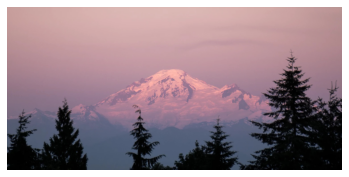

In [3]:
img = mpimg.imread(image_filepath)
plt.imshow(img)
plt.axis("off")
plt.show()

4. Download demo script

In [4]:
script_url = "https://gluon-cv.mxnet.io/_downloads/5966af3c5a6133b4f80f4892e25fb82e/demo_imagenet.py"
script_filepath = "scripts/demo_imagenet.py"
gcv.utils.download(url = script_url, path = script_filepath)

'scripts/demo_imagenet.py'

5. Running demo script

In [5]:
!python scripts/demo_imagenet.py -h

usage: demo_imagenet.py [-h] --model MODEL [--saved-params SAVED_PARAMS]
                        --input-pic INPUT_PIC

Predict ImageNet classes from a given image

optional arguments:
  -h, --help            show this help message and exit
  --model MODEL         name of the model to use
  --saved-params SAVED_PARAMS
                        path to the saved model parameters
  --input-pic INPUT_PIC
                        path to the input picture


In [6]:
!python scripts/demo_imagenet.py --model ResNet50_v1d --input-pic assets/module3/dataset/mt_baker.jpg 

The input picture is classified to be
	[volcano], with probability 0.841.
	[alp], with probability 0.045.
	[valley], with probability 0.006.
	[mountain tent], with probability 0.005.
	[lakeside], with probability 0.005.


### Step-by-Step Demonstration

1. Import packages

In [7]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

2. Load image

In [8]:
image = mx.image.imread(image_filepath)
print(type(image)) # similar to numpy array
print(image.shape) # height, width, channel
print(image.dtype) # unassigned integer 8 bit (0 - 255)

<class 'mxnet.ndarray.ndarray.NDArray'>
(1458, 3000, 3)
<class 'numpy.uint8'>


3. Visualize image

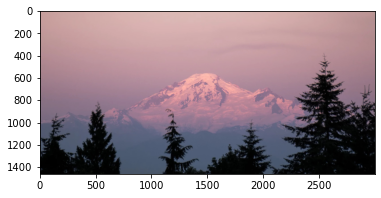

In [9]:
plt.imshow(image.asnumpy())

4. Transform and batch image:
    - Change into 4 dimensions: batch, channel, height, width
    - Change datatype to float32 in order to scale pixels into z-scores

**Knowledge Check**

What is the default input data layout for GluonCV classification models?
- [ ] NCHW
- [ ] CNWH
- [ ] CNHC
- [ ] NWHC

In [10]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)
print(image.shape) # NCHW, cropped into 224 x 224 pixels
print(image.dtype) # into float
print([image.min().asscalar(), image.max().asscalar()]) # range

(1, 3, 224, 224)
<class 'numpy.float32'>
[-2.117904, 2.2489083]


5. Load model

In [11]:
network = gcv.model_zoo.get_model("ResNet50_v1d", pretrained = True)
# network = gcv.model_zoo.resnet50_v1d(pretrained = True)

6. Prediction

In [12]:
prediction = network(image)
prediction.shape # batch, classes

(1, 1000)

In [13]:
prediction = prediction[0]
prediction[990:] # logits score


[ 0.67252696  0.48652077  0.46989343  1.0499997   1.253217    0.8966519
 -0.46537554  0.6439089   0.70805687  0.7872217 ]
<NDArray 10 @cpu(0)>

In [14]:
prob = mx.nd.softmax(prediction) # logits -> probability
prob[990:]


[1.24681406e-04 1.03519007e-04 1.01811995e-04 1.81859374e-04
 2.22839371e-04 1.56004782e-04 3.99591845e-05 1.21163750e-04
 1.29190870e-04 1.39834054e-04]
<NDArray 10 @cpu(0)>

- logit: no range (-Inf to +Inf)
- softmax(logit): range from 0 to 1 (probability)

**Knowledge Check**

Which 2 of the following options are correct softmax outputs?
- [ ] softmax([-0.5, 0.5]) -> [0.27, 0. 73]
- [ ] softmax([-0.5, 0.5]) -> [0.66, 0. 54]
- [ ] softmax([-1.0, 1.0]) -> [0.12, 0.88]
- [ ] softmax([-1.0, 1.0]) -> [0.88, 0.12]

In [15]:
mx.nd.softmax(mx.nd.array([-0.5, 0.5]))


[0.26894143 0.7310586 ]
<NDArray 2 @cpu(0)>

In [16]:
mx.nd.softmax(mx.nd.array([-1, 1]))


[0.11920291 0.880797  ]
<NDArray 2 @cpu(0)>

7. Get top-k

In [17]:
top5_idx = mx.nd.topk(prob, k = 5)
top5_idx


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

8. Get class labels

In [18]:
for i, idx in enumerate(top5_idx):
    idx = idx.astype('int').asscalar()
    print(f"#{i+1} {network.classes[idx]} ({prob[idx].asscalar():.3f})")

#1 volcano (0.841)
#2 alp (0.045)
#3 valley (0.006)
#4 mountain tent (0.005)
#5 lakeside (0.005)


## Using a Pre-trained Model for Object Detection

### Object Detection

Objective: locate objects in an image by predicting the coordinate of bounding box and classify it.

**Knowledge Check**

How many values does it typically take to represent a bounding box?
- [ ] 2
- [ ] 4
- [ ] 8
- [ ] 16

Object detection datasets examples:

1. Pascal VOC (Visual Object Classes)
    - 2007: 10K images, 24.5K objects
    - 2012: 11.5K images, 27.5K objects

2. COCO (Common Objects in Context)
    - 123K images, 886K objects

Model architecture for object detection:
1. Faster-RCNN (with ResNet)
2. SSD (with VGG/ResNet/MobileNet)
3. YOLO (with DarkNet/MobileNet)

Trade-off between mean average precision (MAP), speed, and memory:

<img src="assets/module3/tradeoff-object-detection.png" width="400">

SSD is not recommended for object detection.

Reference of object detection model zoo: https://gluon-cv.mxnet.io/model_zoo/detection.html

**Knowledge Check**

Which object detection model typically gives the best Mean average precision?
- [ ] Faster-RCNN
- [ ] SSD
- [ ] YOLO
- [ ] ResNet

### Step-by-Step Demonstration

1. Import packages

In [19]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

2. Download image

In [20]:
image_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_filepath = "assets/module3/dataset/dog.jpg"
gcv.utils.download(url = image_url, path = image_filepath)

'assets/module3/dataset/dog.jpg'

3. Load image

In [21]:
image = mx.image.imread(image_filepath)
print(type(image)) # similar to numpy array
print(image.shape) # height, width, channel
print(image.dtype) # unassigned integer 8 bit (0 - 255)

<class 'mxnet.ndarray.ndarray.NDArray'>
(576, 768, 3)
<class 'numpy.uint8'>


4. Visualize image

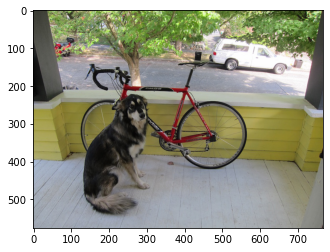

In [22]:
plt.imshow(image.asnumpy())

5. Transform and batch image:
    - Change into 4 dimensions: batch, channel, height, width
    - Change datatype to float32 in order to scale pixels into z-scores

In [23]:
image, chw_image = gcv.data.transforms.presets.yolo.transform_test(image, short = 512)
print(image.shape) # NCHW, height 512 pixels, keeping ratio aspect
print(image.dtype) # into float
print([image.min().asscalar(), image.max().asscalar()]) # range

(1, 3, 512, 683)
<class 'numpy.float32'>
[-2.117904, 2.64]


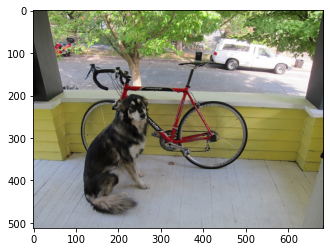

In [24]:
plt.imshow(chw_image) # cropped image

6. Load model

In [25]:
network = gcv.model_zoo.get_model("yolo3_darknet53_coco", pretrained = True)

7. Make prediction

In [26]:
prediction = network(image)
print(type(prediction)) # tuple instead of NDArray

info = ["object classes idx", "object class prob", "object bounding box coords"]
for idx, arr in enumerate(prediction):
    print(f"Idx-{idx}: {arr.shape} -> {info[idx]}")
    
# shape: batch, classes, values

<class 'tuple'>
Idx-0: (1, 100, 1) -> object classes idx
Idx-1: (1, 100, 1) -> object class prob
Idx-2: (1, 100, 4) -> object bounding box coords


8. Unpack `prediction`

In [27]:
prediction = [array[0] for array in prediction]
class_idx, prob, bounding_boxes = prediction

In [28]:
print(class_idx[:10]) # -1 -> no detected object
print(network.classes[16])


[[16.]
 [ 1.]
 [ 7.]
 [ 2.]
 [13.]
 [ 0.]
 [58.]
 [-1.]
 [-1.]
 [-1.]]
<NDArray 10x1 @cpu(0)>
dog


In [29]:
print(prob[:10])
# set threshold for probabilities


[[ 0.9922735 ]
 [ 0.9646552 ]
 [ 0.6890209 ]
 [ 0.23493634]
 [ 0.01805799]
 [ 0.01063591]
 [ 0.01027783]
 [-1.        ]
 [-1.        ]
 [-1.        ]]
<NDArray 10x1 @cpu(0)>


In [30]:
print(bounding_boxes[:10])
# coords: top-left (x,y) and bottom-right (x,y)


[[116.383095 201.52261  281.88876  482.33267 ]
 [ 94.03961  107.238846 504.9234   376.52264 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [417.18365   69.68815  614.6805   149.04834 ]
 [ 91.044464 124.7944   504.3832   403.5773  ]
 [532.793     92.20426  547.2879   104.81126 ]
 [ 51.13082   68.555534  95.09498  111.6173  ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]
 [ -1.        -1.        -1.        -1.      ]]
<NDArray 10x4 @cpu(0)>


**Knowledge Check**

With a batch size of 64 and a model that predicts up to 100 objects, what are the output shapes of the class indicies, probabilities and bounding boxes?
- [ ] (64, 100, 1), (64, 100, 1) and (64, 100, 4)
- [ ] (64, 1), (64, 1) and (64, 4)
- [ ] (100, 64, 1), (100, 64, 1) and (100, 64, 4)
- [ ] (64, 4, 1), (64, 4, 1) and (64, 4, 100)

9. Visualize prediction

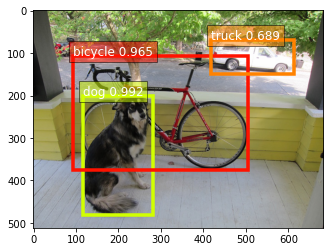

In [31]:
gcv.utils.viz.plot_bbox(chw_image,
                        bounding_boxes,
                        prob,
                        class_idx,
                        class_names = network.classes)

## Using a Pre-trained Model for Image Segmentation

Two subtasks: semantic and instance segmentation

1. Semantic segmentation
    - Objective: classify each pixels simultaneously and then assign/overlay color to each cluster of pixels
    - Background image will be assigned class index -1 with color black

2. Instance segmentation
    - Just like semantic segmentation, but for each objects in a same class will have different label.
    - Example: in semantic, two trees will be assigned the same label "Tree". But in instance segmentation the trees will be treated differently.

**Knowledge Check**

Which technique classifies every pixel of an image?
- [ ] Semantic Segmentation
- [ ] Instance Segmentation

Image segmentation datasets examples:

Similar to object detection:
1. Pascal VOC (Visual Object Classes)
    - 2012: 2.9K images, 6.9K objects

2. COCO (Common Objects in Context)
    - 2017: 123K images, 886K objects
    - only used 20 classes instead of 80

3. ADE20K
    - 2016: 20K images, 400K objects
    - more diverse label

**Knowledge Check**

Which dataset provides the largest number of labelled classes for semantic segmentation?
- [ ] Pascal VOC
- [ ] COCO
- [ ] ADE-20k
- [ ] ImageNet

Model architecture for image segmentation:
1. FCN (with ResNet)
2. PSP (with ResNet)
3. DeepLab (with ResNet)

Trade-off between pixel accuracy, speed, and memory:

<img src="assets/module3/tradeoff-image-segmentation.png" width="400">

Reference of object detection model zoo: https://gluon-cv.mxnet.io/model_zoo/segmentation.html

### Step-by-Step Demonstration

1. Import packages

In [32]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

2. Download image

In [33]:
image_url = "https://raw.githubusercontent.com/zhreshold/mxnet-ssd/master/data/demo/dog.jpg"
image_filepath = "assets/module3/dataset/dog.jpg"
gcv.utils.download(url = image_url, path = image_filepath)

'assets/module3/dataset/dog.jpg'

3. Load image

In [34]:
image = mx.image.imread(image_filepath)
print(type(image)) # similar to numpy array
print(image.shape) # height, width, channel
print(image.dtype) # unassigned integer 8 bit (0 - 255)

<class 'mxnet.ndarray.ndarray.NDArray'>
(576, 768, 3)
<class 'numpy.uint8'>


4. Visualize image

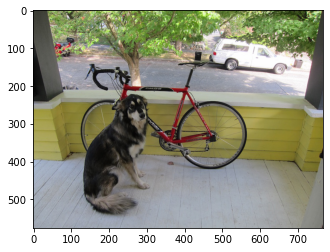

In [35]:
plt.imshow(image.asnumpy())

5. Transform image

In [36]:
from mxnet.gluon.data.vision import transforms

# manually defined
transform_function = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([.485, .456, .406],
                         [.229, .224, .225])
])

In [37]:
image = transform_function(image)
print(image.shape) # CHW
print(image.dtype) # into float
print([image.min().asscalar(), image.max().asscalar()]) # range

(3, 576, 768)
<class 'numpy.float32'>
[-2.117904, 2.64]


6. Batch image

In [38]:
image = image.expand_dims(0)
print(image.shape) # NCHW

(1, 3, 576, 768)


7. Load model

In [39]:
network = gcv.model_zoo.get_model("fcn_resnet50_ade", pretrained = True)

8. Make prediction

In [40]:
output = network.predict(image)
print(output.shape) 
# NDArray: batch, class, height, width

output = output[0]
print(output.shape)

(1, 150, 576, 768)
(150, 576, 768)


Example for classify one pixel

In [41]:
ex_logit = output[:, 300, 500] # this is logit score
ex_prob = mx.nd.softmax(ex_logit) # probability distribution
ex_class_idx = mx.nd.argmax(ex_prob, axis = 0) # most likely class
ex_class_idx = ex_class_idx[0].astype('int').asscalar()
ex_class_idx

127

In [42]:
from gluoncv.data.ade20k.segmentation import ADE20KSegmentation

# lookup table
class_label = ADE20KSegmentation.CLASSES[ex_class_idx]
class_label

'bicycle, bike, wheel, cycle'

Visualize probability distribution for each pixels

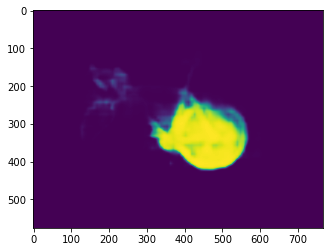

In [43]:
output_prob = mx.nd.softmax(output, axis = 0) # apply softmax for each pixels
output_heatmap = output_prob[ex_class_idx]
plt.imshow(output_heatmap.asnumpy())

9. Visualize most likely class

In [44]:
prediction = mx.nd.argmax(output, 0).asnumpy()
print(prediction.shape)
print(prediction) # classify each pixels with a class

(576, 768)
[[0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 [0. 0. 0. ... 4. 4. 4.]
 ...
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]
 [3. 3. 3. ... 0. 0. 0.]]


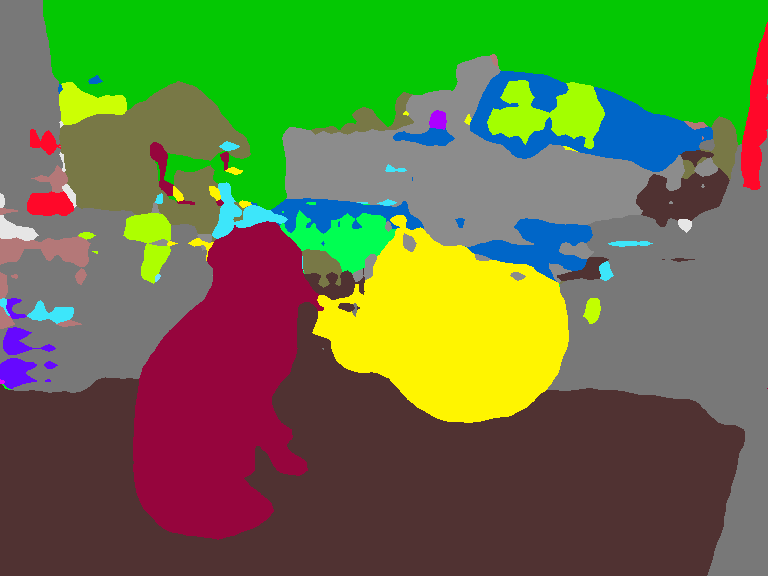

In [45]:
from gluoncv.utils.viz import get_color_pallete

# map each class with different color
prediction_img = get_color_pallete(prediction, "ade20k")
prediction_img

**Knowledge Check**

Given an output of shape (140, 128, 128), what function can be used to find the most likely class for each pixel?
- [ ] max on along axis=1
- [ ] argmax along axis=1
- [ ] argmax along axis=0
- [ ] max on along axis=0

## Neural Networks

### Fully Connected

<img src="assets/module3/nn-overview.png" width="400">

Neural network training procedure:

1. Initialize
    - Random initialize weight connecting from node to node

2. Forward pass
    - Weighted sum
    - Apply activation function, to learn non-linear pattern

<img src="assets/module3/nn-forward-pass.png" width="400">

3. Backward pass
    - Determine loss function to measure performance of the network (comparing predicted value to truth)
    - The loss function must be differentiable so that we can calculate the gradient with respect to every parameter (minimization of loss)

4. Update
    - The gradient is used to updating/tuning the parametes
    
<img src="assets/module3/nn-backward-pass.png" width="400">

**Knowledge Check**

Activation functions are used ...
- [ ] so that non-linear relationships can be modeled.
- [ ] to improve model interpretability.
- [ ] to make the network more efficient.
- [ ] to stabilize network training.

Which stage of training calculates the parameter gradients?
- [ ] initialization
- [ ] forward pass
- [ ] backward pass
- [ ] update stage

### Convolution and Max Pooling

Limitation of fully connected network:
- Ignore spatial information of the pixels
- Large number of parameters to be learned

Convolutional network learn local pattern from the image by convolutional operation and max pooling.

<img src="assets/module3/conv-and-max-pooling.png" width="400">

Convolutional operation:

<img src="assets/module3/conv-operation.png" width="400">

Example:
- Kernel is 3 by 3 matrix used to detect vertical edges
- The higher the value in output meaning that detect vertical edges
- The output size is reduced, to compensate use padding:

<img src="assets/module3/conv-padding.png" width="400">


Different types of kernel:

1. Vertical edge

<img src="assets/module3/conv-vertical-edges.png" width="400">

2. Sobel kernel: extract edge features

<img src="assets/module3/conv-sobel.png" width="400">

3. Sharpen

<img src="assets/module3/conv-sharpen.png" width="400">

Kernel is typically a multi-channel layer, not only single:

<img src="assets/module3/conv-multi-channels.png" width="400">

**Knowledge Check**

Assume we have an input with shape (3, 3), and apply a convolution with a kernel size of (2, 2) and no padding. What is the expected output shape?
- [ ] (1, 1)
- [ ] (2, 2)
- [ ] (3, 3)
- [ ] (5, 5)

Max-pooling operation:
- used in conjunction with convolutional operation
- effectively reduce spatial dimension of the input
- introduce invariant rotation

Example: `stride = 2` it will reduce half the dimension

<img src="assets/module3/max-pooling.png" width="400">

## Summary

1. MXNet: install mkl version if using CPU Intel and install cuda version if using GPU NVIDIA
2. Pre-trained models with GluonCV:
    - Image classification
    - Object detection
    - Image segmentation
3. Datasets: better prepared on selecting pre-trained models from the model zoo
    - ImageNet1K
    - CIFAR-10
    - COCO: object detection and image segmentation
    - ADE20k
    - PASCAL VOC
4. Model architectures
    - ResNet: one of the most popular network
    - MobileNet: for mobile apps
    - etc...
5. Fundamental components:
    - Convolutional operation
    - Max pooling operation